In [2]:
from automate import *

In [3]:
with (open("df_comparison.pkl", "rb")) as openfile:
    df = pickle.load(openfile)

In [4]:
with (open("data.pkl", "rb")) as openfile:
    data = pickle.load(openfile)

data["v_gene_one_hot"]  = data["v_gene_one_hot"].apply(lambda x: x.reshape(54))
data["j_gene_one_hot"]  = data["j_gene_one_hot"].apply(lambda x: x.reshape(13))
data = [np.stack(col.values) for _, col in data.items()]
#X_train = tf.constant(df["CDR3"].to_numpy())
#X_train_v_gene = tf.constant(df["v_gene"].to_numpy())
#X_train_j_gene = tf.constant(df["j_gene"].to_numpy())
X_train = data

In [5]:
params = {
            "latent_dim": 20,
            "dense_nodes": 75,
            "aa_embedding_dim": 21,
            "v_gene_embedding_dim": 54,
            "j_gene_embedding_dim": 13,
            "beta": 0.75,
            "max_cdr3_len": 20,
            "n_aas": 21,
            "n_v_genes": 54,
            "n_j_genes": 13,
            "stopping_monitor": "val_loss",
            "batch_size": 100,
            "pretrains": 2,
            "warmup_period": 3,
            "epochs": 4,
            "patience": 20,
            "n_inputs" : 20,
            "v_inputs" : 54,
            "j_inputs" : 13
        }

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cdr3_input (InputLayer)        [(None, 20)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 40)           840         ['cdr3_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 40)          160         ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 v_gene_input (InputLayer)      [(None, 54)]         0           []                           

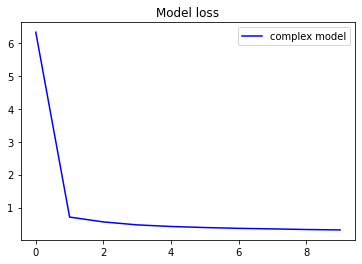

In [6]:
model, encoder = train_model_complex(df, X_train, params=params)

  0%|          | 0/236345 [00:00<?, ?it/s]

300
(300, 20)


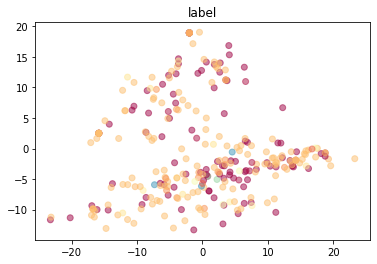

c:\Users\yanis\OneDrive\PC HP SPECTRE 2019\Documents\M4R Project\automate.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[str(label+"_kmeans_label")] = kmeans.labels_


Accuracy:  0.51


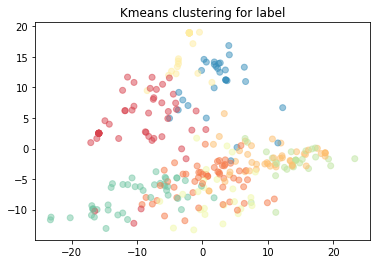

In [7]:
N = 300
X_test = X_train[:N]
model_results(df, X_test, encoder, label="label")

Epoch 1/4
7386/7386 [==============================] - 12s 2ms/step - loss: 13.2557
Epoch 2/4
7386/7386 [==============================] - 11s 2ms/step - loss: 9.6864
Epoch 3/4
7386/7386 [==============================] - 10s 1ms/step - loss: 9.2929
Epoch 4/4
7386/7386 [==============================] - 13s 2ms/step - loss: 8.9413: 0s - loss:


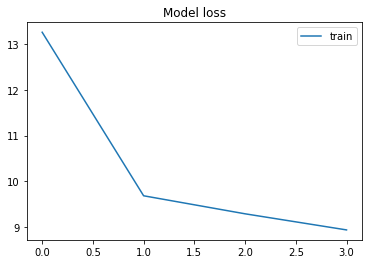

In [8]:
params = {  "n_inputs" : 20,
            "epochs": 4,
            "batch_size": 32,}
model, encoder = train_model_basic(df, X_train, params=params)

  0%|          | 0/236345 [00:00<?, ?it/s]

300
(300, 2)


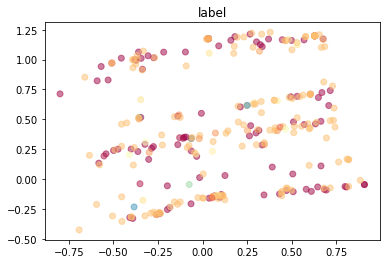

c:\Users\yanis\OneDrive\PC HP SPECTRE 2019\Documents\M4R Project\automate.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[str(label+"_kmeans_label")] = kmeans.labels_
C:\Users\yanis\AppData\Roaming\Python\Python38\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Accuracy:  0.51


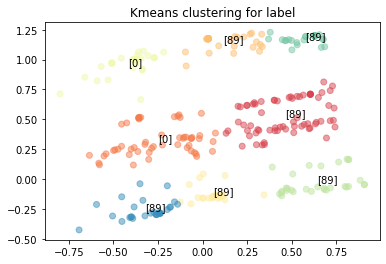

In [9]:
model_results(df, X_test, encoder, label="label", mode_complex=False)